# 10) Data structures accepted by seaborn (2)

## 모듈 불러오기

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plt.ion()

In [4]:
plt.style.use('bmh')

## Options for visualizing long-form data

In [5]:
flights = sns.load_dataset('flights')

### Python Dictionary Type

In [6]:
flights_dict = flights.to_dict()

In [8]:
print(flights_dict)

{'year': {0: 1949, 1: 1949, 2: 1949, 3: 1949, 4: 1949, 5: 1949, 6: 1949, 7: 1949, 8: 1949, 9: 1949, 10: 1949, 11: 1949, 12: 1950, 13: 1950, 14: 1950, 15: 1950, 16: 1950, 17: 1950, 18: 1950, 19: 1950, 20: 1950, 21: 1950, 22: 1950, 23: 1950, 24: 1951, 25: 1951, 26: 1951, 27: 1951, 28: 1951, 29: 1951, 30: 1951, 31: 1951, 32: 1951, 33: 1951, 34: 1951, 35: 1951, 36: 1952, 37: 1952, 38: 1952, 39: 1952, 40: 1952, 41: 1952, 42: 1952, 43: 1952, 44: 1952, 45: 1952, 46: 1952, 47: 1952, 48: 1953, 49: 1953, 50: 1953, 51: 1953, 52: 1953, 53: 1953, 54: 1953, 55: 1953, 56: 1953, 57: 1953, 58: 1953, 59: 1953, 60: 1954, 61: 1954, 62: 1954, 63: 1954, 64: 1954, 65: 1954, 66: 1954, 67: 1954, 68: 1954, 69: 1954, 70: 1954, 71: 1954, 72: 1955, 73: 1955, 74: 1955, 75: 1955, 76: 1955, 77: 1955, 78: 1955, 79: 1955, 80: 1955, 81: 1955, 82: 1955, 83: 1955, 84: 1956, 85: 1956, 86: 1956, 87: 1956, 88: 1956, 89: 1956, 90: 1956, 91: 1956, 92: 1956, 93: 1956, 94: 1956, 95: 1956, 96: 1957, 97: 1957, 98: 1957, 99: 1957, 

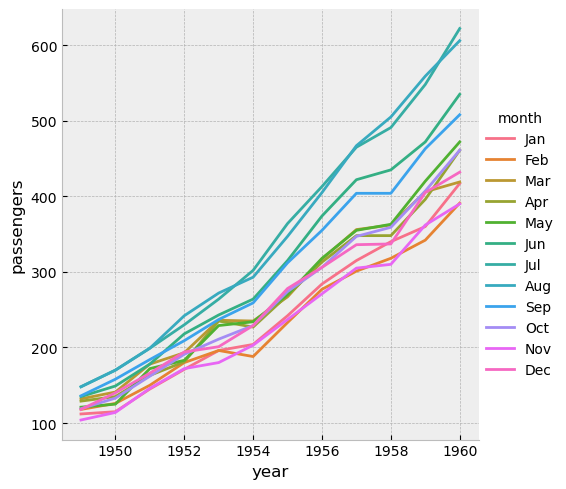

In [10]:
sns.relplot(
    data=flights_dict,
    x='year',
    y='passengers',
    hue='month',
    kind='line'
);

### Pandas Groupby Type

In [11]:
flights_avg = flights.groupby('year').mean()

/var/folders/6c/zr_z6x_n2xd6yb62fwbylhrr0000gn/T/ipykernel_34964/324438524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_avg = flights.groupby('year').mean()


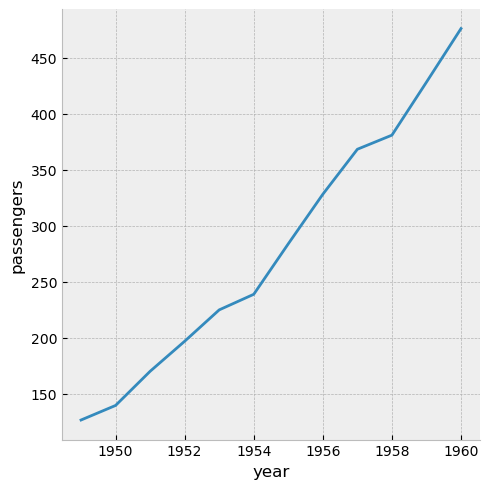

In [12]:
sns.relplot(
    data=flights_avg,
    x='year', 
    y='passengers', 
    kind='line'
);

### Vector Type Data

In [13]:
year = flights_avg.index

In [14]:
passengers = flights_avg['passengers']

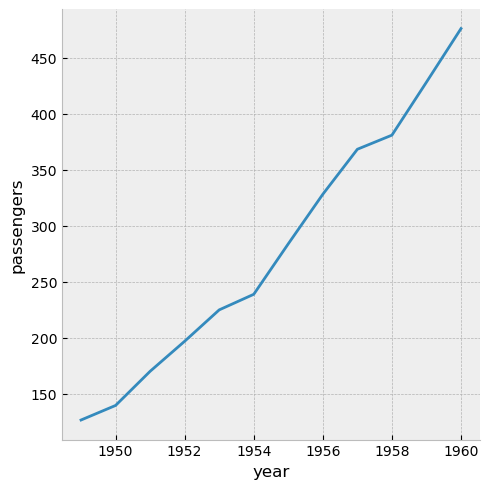

In [15]:
sns.relplot(
    x=year, 
    y=passengers, 
    kind='line'
);

### Numpy Array, Python List Type

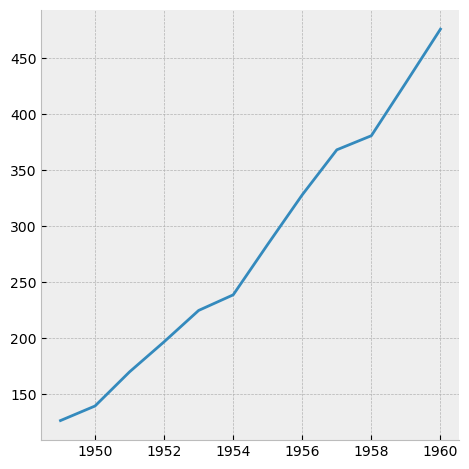

In [19]:
sns.relplot(
    x=year.to_numpy(),
    y=passengers.to_list(),
    kind='line'
);

## Options for visualizing wide-form data

### Vector Type Data 1

In [31]:
flights_wide = flights.pivot(index='year', columns='month', values='passengers')

In [32]:
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


In [33]:
flights_wide_list = [col for _, col in flights_wide.items()]

In [36]:
flights_wide_list[0]

year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
1956    284
1957    315
1958    340
1959    360
1960    417
Name: Jan, dtype: int64

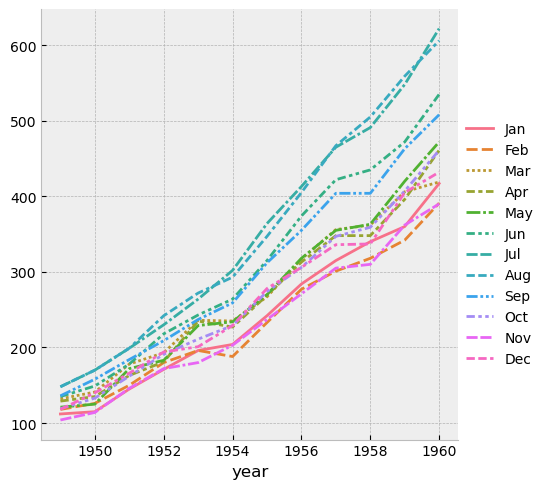

In [35]:
sns.relplot(
    data=flights_wide_list,
    kind='line'
);

### Vector Type Data 2

In [38]:
two_series = [flights_wide.loc[:1955, 'Jan'], flights_wide.loc[1952:, 'Aug']]

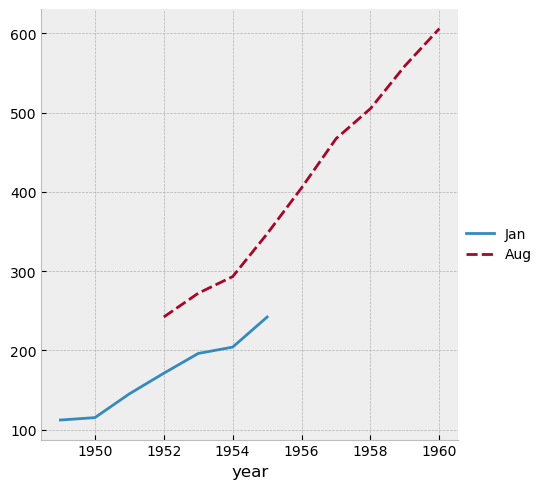

In [40]:
sns.relplot(
    data=two_series, 
    kind='line'
);

### Python Dictionary Type

In [41]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}

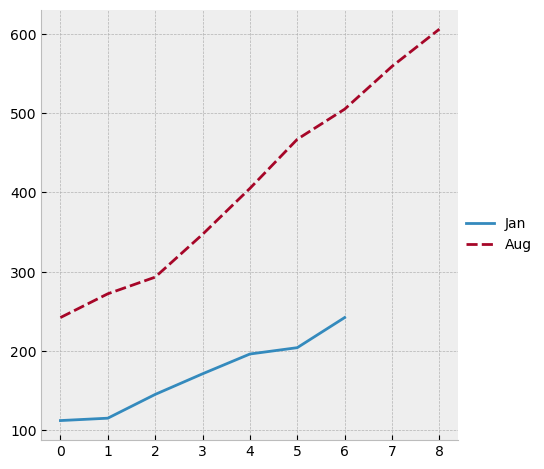

In [42]:
sns.relplot(
    data=two_arrays_dict, 
    kind='line'
);

### Numpy Array Type

In [43]:
flights_array = flights_wide.to_numpy()

In [44]:
flights_array

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]])

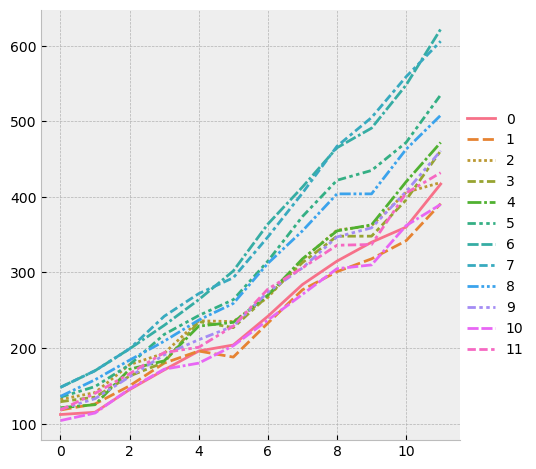

In [45]:
sns.relplot(
    data=flights_array,
    kind='line'
);